In [5]:
import tensorflow as tf
from tensorflow .keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE  
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names

In [10]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 0 1 1 1 1 1 2 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1]


In [14]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[156. 142. 142.]
  [146. 132. 132.]
  [154. 140. 140.]
  ...
  [185. 174. 178.]
  [178. 167. 171.]
  [178. 167. 171.]]

 [[140. 126. 126.]
  [151. 137. 137.]
  [150. 136. 136.]
  ...
  [181. 170. 174.]
  [185. 174. 178.]
  [191. 180. 184.]]

 [[125. 111. 111.]
  [148. 134. 134.]
  [158. 144. 144.]
  ...
  [180. 169. 173.]
  [181. 170. 174.]
  [186. 175. 179.]]

 ...

 [[148. 133. 138.]
  [153. 138. 143.]
  [149. 134. 139.]
  ...
  [171. 159. 163.]
  [174. 162. 166.]
  [179. 167. 171.]]

 [[128. 113. 118.]
  [135. 120. 125.]
  [166. 151. 156.]
  ...
  [174. 162. 166.]
  [174. 162. 166.]
  [178. 166. 170.]]

 [[142. 127. 132.]
  [157. 142. 147.]
  [145. 130. 135.]
  ...
  [176. 164. 168.]
  [172. 160. 164.]
  [173. 161. 165.]]]


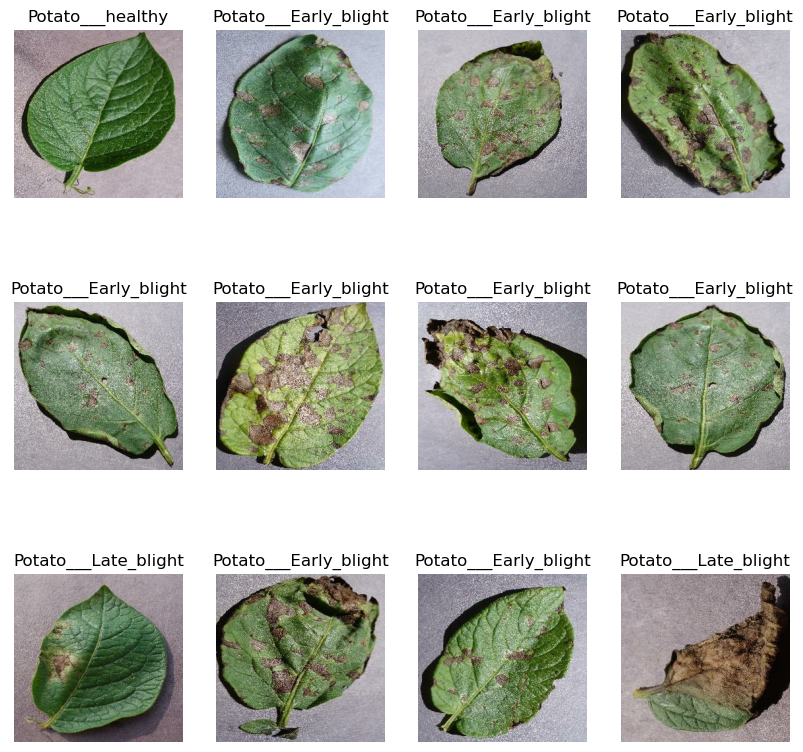

In [22]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [26]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [27]:
train_ds=dataset.take(54)
len(train_ds)

54

In [28]:
test_ds=dataset.skip(54)

In [29]:
len(test_ds)

14

In [31]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [32]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [34]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=121)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [35]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [36]:
len(train_ds)

54

In [37]:
len(val_ds)

6

In [38]:
len(test_ds)

8

In [41]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [43]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [46]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [47]:
resize_and_rescale

In [48]:

data_augmentation